# Exploratory data analysis

To begin with the analysis, first I import some libraries and print some of basic information and statistics about the data

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn.preprocessing import minmax_scale
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

In [2]:
df = pd.read_csv('train.csv')

In [3]:
df.shape

(891, 12)

In [4]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


# Visualization

The following are two util functions to plot the data, so we can visualize and have a better notion about each feature and its relation with the target

In [6]:
def plot_bar_chart(df, feature):
    
    df1 = df.copy()
    df1 = df1[[feature, 'Survived']]
    df1['Died'] = 1 - df1['Survived']
    
    df1 = df1.groupby(feature).sum().sort_values(by=[feature])
    
    survived = df1['Survived']
    died = df1['Died']
    
    x_labels = df1.index
    loc = np.arange(len(x_labels))
    width = 0.2

    fig, ax = plt.subplots()
    ax.bar(loc - width/2, died, width, color='IndianRed', label='Died')
    ax.bar(loc + width/2, survived, width, color='YellowGreen', label='Survived')

    ax.set_ylabel('Number of Passengers')
    ax.set_title('Number of Passengers by ' + feature)
    ax.set_xticks(loc)
    ax.set_xticklabels(x_labels)
    ax.legend()
    

In [7]:
def plot_hist_chart(df, feature, bins=10):
    df1 = df[[feature, 'Survived']].dropna()

    fig, ax = plt.subplots()
    ax.hist(df1[df1['Survived'] == 0][feature], bins=bins, color='IndianRed', label='Died', alpha=.8)
    ax.hist(df1[df1['Survived'] == 1][feature], bins=bins, color='YellowGreen', label='Survived', alpha=.8)
    ax.set_title('Number of Passengers by ' + feature)
    ax.set_ylabel('Number of Passengers')
    ax.set_xlabel(feature)
    ax.legend()

### Pclass

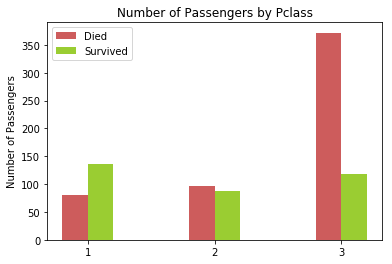

In [8]:
plot_bar_chart(df, 'Pclass')

### Sex

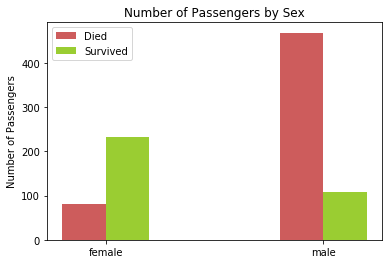

In [9]:
plot_bar_chart(df, 'Sex')

### Age

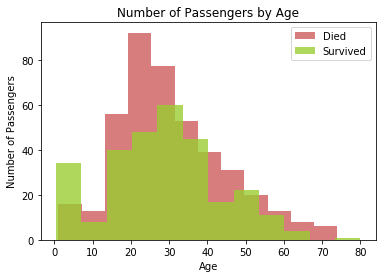

In [10]:
plot_hist_chart(df, 'Age', 12)

### SibSp

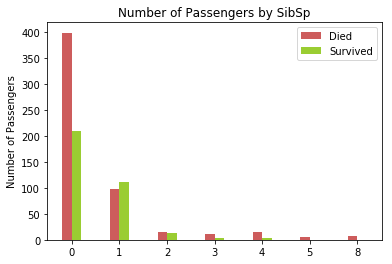

In [11]:
plot_bar_chart(df, 'SibSp')

### Parch

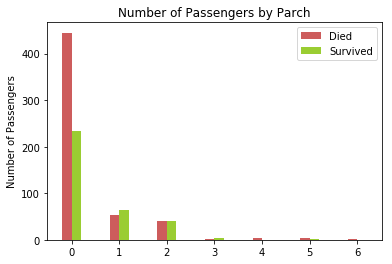

In [12]:
plot_bar_chart(df, 'Parch')

### Fare

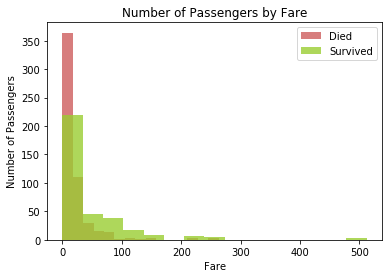

In [13]:
plot_hist_chart(df, 'Fare', 15)

### Embarked

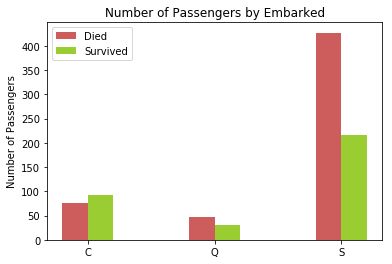

In [14]:
plot_bar_chart(df, 'Embarked')

# Correlations

In this section I create a dataframe with the dummies (categorical) or/and normalized (numeric) values of each feature.

In [15]:
def add_corr_dummies(df, df_corr, feature):
    df_dummies = pd.get_dummies(df[feature], prefix=feature)
    return pd.concat([df_corr, df_dummies], axis=1)

In [16]:
def add_corr_normalized(df, df_corr, feature):
    df_corr[feature] = minmax_scale(df[[feature]].astype(float))
    return df_corr

In [17]:
df_corr = df[['Survived']]

### Pclass

Create dummies for the feature Pclass

In [18]:
df_corr = add_corr_dummies(df, df_corr, 'Pclass')

### Sex

Create dummies for feature Sex

In [19]:
df_corr = add_corr_dummies(df, df_corr, 'Sex')

### Age
I've tried to separate feature Age into bins and then create dummies for these bins, but the normalized feature seemed to work better.

In [20]:
#bins_age = pd.IntervalIndex.from_tuples([(-1, 8), (8, 14), (14, 30), (30, 40), (40, 55), (55, 100)])
#df['Age_cat'] = pd.cut(df['Age'], bins_age)
#df_corr = add_corr_dummies(df, df_corr, 'Age_cat')

df_corr = add_corr_normalized(df, df_corr, 'Age')

### SibSp
I've tried to separate feature SibSp into bins and then create dummies for these bins, but the normalized feature seemed to work better.

In [21]:
#bins_sibsp = pd.IntervalIndex.from_tuples([(-1, 0), (0, 1), (1, 10)])
#df['SibSp_cat'] = pd.cut(df['SibSp'], bins_sibsp)
#df_corr = add_corr_dummies(df, df_corr, 'SibSp_cat')

df_corr = add_corr_normalized(df, df_corr, 'SibSp')

### Parch
I've tried to separate feature Parch into bins and then create dummies for these bins, but the normalized feature seemed to work better.

In [22]:
#bins_parch = pd.IntervalIndex.from_tuples([(-1, 0), (0, 1), (1, 2), (2, 10)])
#df['Parch_cat'] = pd.cut(df['Parch'], bins_parch)
#df_corr = add_corr_dummies(df, df_corr, 'Parch_cat')

df_corr = add_corr_normalized(df, df_corr, 'Parch')

### Fare

Normalize feature Fare

In [23]:
df_corr = add_corr_normalized(df, df_corr, 'Fare')

### Embarked
Create dummies for feature Embarked

In [24]:
df_corr = add_corr_dummies(df, df_corr, 'Embarked')

### Features and Target

In [25]:
df_corr = df_corr.dropna()

In [26]:
X = df_corr.drop(columns=['Survived'])
Y = df_corr['Survived']

In [27]:
X.head()

,Pclass_1,Pclass_2,Pclass_3,Sex_female,Sex_male,Age,SibSp,Parch,Fare,Embarked_C,Embarked_Q,Embarked_S
0,0,0,1,0,1,0.271174,0.125,0.0,0.014151,0,0,1
1,1,0,0,1,0,0.472229,0.125,0.0,0.139136,1,0,0
2,0,0,1,1,0,0.321438,0.000,0.0,0.015469,0,0,1
3,1,0,0,1,0,0.434531,0.125,0.0,0.103644,0,0,1
4,0,0,1,0,1,0.434531,0.000,0.0,0.015713,0,0,1


Then I used some models to analyse the correlation between the features and the target.
I'm using the mean of the coefficients of the top 6 features to compare the values before and after creating new features in df_corr.

From each one of the models I got the 6 most important features

In [28]:
important_features = []

### Random Forest

Mean of top 6 coeficients of random forest : 0.1468908740671387


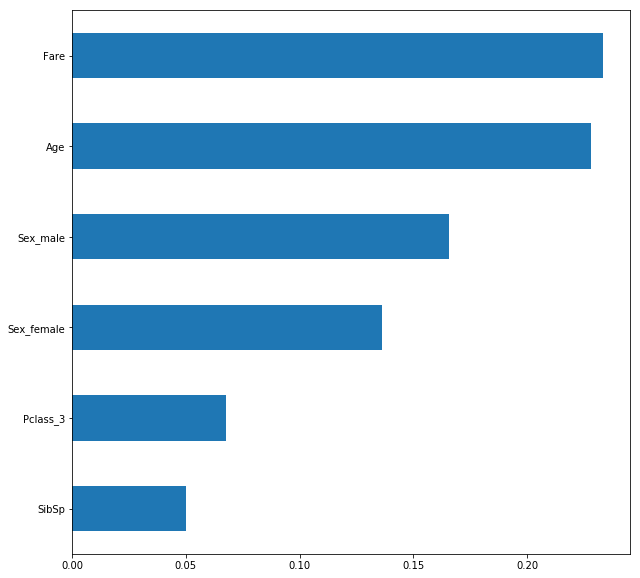

In [29]:
rf = RandomForestClassifier(n_estimators=20, max_depth=10, random_state=42)
rf.fit(X, Y)

rf_imp = pd.Series(rf.feature_importances_, index=list(X)).abs().sort_values()[-6:]

important_features = important_features + rf_imp.index.tolist()

rf_imp.plot(kind='barh', figsize=(10, 10), colormap='tab10')
print('Mean of top 6 coeficients of random forest :', rf_imp.mean())

### Logistic Regression

Mean of top 6 coeficients of logistic regression: 0.7706522569357254


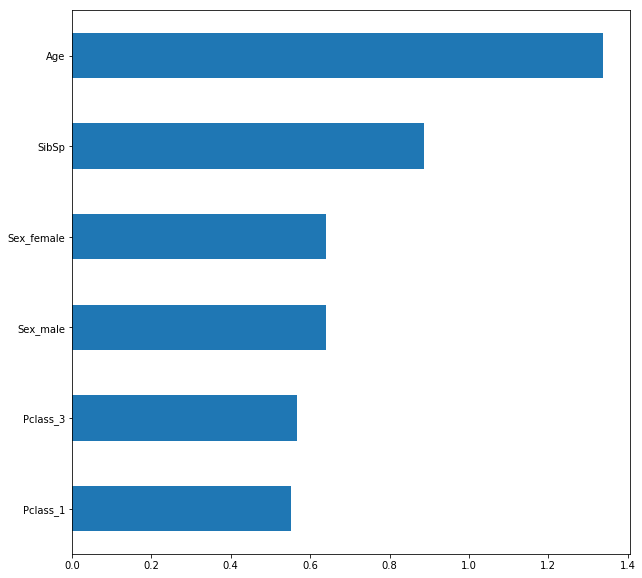

In [30]:
lr = LogisticRegression(solver='lbfgs', multi_class='multinomial', random_state=42)
lr.fit(X, Y)

lr_imp = pd.Series(lr.coef_[0] , index=list(X)).abs().sort_values()[-6:]

important_features = important_features + lr_imp.index.tolist()

lr_imp.plot(kind='barh', figsize=(10, 10), colormap='tab10')
print('Mean of top 6 coeficients of logistic regression:', lr_imp.mean())

### Important Features

In [31]:
set(important_features)

{'Age', 'Fare', 'Pclass_1', 'Pclass_3', 'Sex_female', 'Sex_male', 'SibSp'}